In [83]:
library("dplyr")
library("ggplot2")
library("gridExtra")

In [84]:
SEED <- 1771
N <- c(2, 29, 73)
MIN <- 10
MAX <- 14
SAMPLES <- 950

In [85]:
set.seed(SEED)

In [91]:
df <- data.frame(i = c(), value = c())

for (n in N) {
  col <- c()
  for (i in 1:SAMPLES) {
    sample <- runif(n, min = MIN, max = MAX) %>%
      mean()
    df <- df %>%
      rbind(data.frame(i = n, value = sample, sd = 3, mean = 12))
  }
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


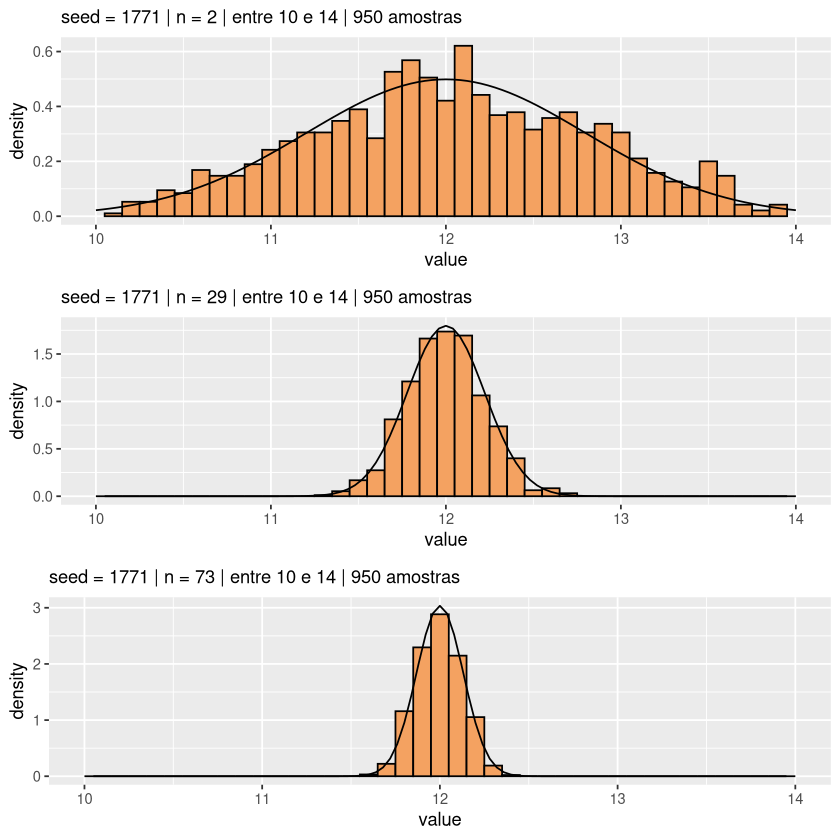

In [104]:
plots <- list()
for (n in N) {
  df_filtered <- df %>%
    filter(i == n)
  #var <- (sd(df_filtered$value)^2) / n
  var <- sd(df_filtered$value)^2
  plot <- df_filtered %>%
    ggplot(aes(x = value)) +
      geom_histogram(aes(y = ..density..), colour = "black", fill = "#f4a261",
        binwidth = 0.1) +
      scale_fill_brewer(palette = "Dark2") +
      stat_function(fun = dnorm, args = list(mean = mean(c(MIN, MAX)), sd = sqrt(var))) +
      xlim(c(MIN, MAX)) +
      labs(subtitle = sprintf("seed = %d | n = %d | entre %d e %d | %d amostras", SEED, n, MIN, MAX, SAMPLES))

  plots <- plots %>% append(list(plot))
}

do.call(grid.arrange, plots)